In [ ]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [149]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
import re

# First-time use: Ensure that NLTK's stopwords are downloaded
nltk.download('stopwords')

def preprocess_text(text):
    # Load basic English stopwords
    stop_words = set(stopwords.words('english'))

    # Add more project-specific stopwords
    custom_stopwords = {
        'one', 'like', 'much', 'us', 'even', 'well', 'first', 'year', 'years', 'almost', 'take', 'put', 'able', 'become', 'behind',
        'level', 'great', 'content', 'right', 'left', 'going', 'would', 'per', 'since', 'video', 'theres', 'data', 'music',
        'time', 'data', 'youtube', 'words', 'videos', 'become', 'give', 'example', 'g', 'last', 'less', 'high', 'behind',
        'v', 'states', 'world', 'music', 'time', 'amount', 'coming', 'soon', 'also', 'according', 'end', 'however', 'came', 'probably', 'making', 'go', 'whether', 'things', 'canada', 'canadian'
        , 'united', 'nid', 'started', 'canadas', 'amounts', 'ask'
    }
    stop_words.update(custom_stopwords)

    # Clean the text: remove non-alphabet characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()  # Convert to lowercase
    words = text.split()

    # Filter out stopwords
    filtered_words = [word for word in words if word not in stop_words]
    return filtered_words

# Load and preprocess the text
with open('/content/Video 2.txt', 'r', encoding='utf-8') as file:
    text = file.read()
processed_words = preprocess_text(text)

# Recount word frequency with the adjusted list
word_freq = Counter(processed_words)
print(word_freq.most_common(50))



[('economy', 15), ('investment', 11), ('gdp', 8), ('ai', 6), ('decline', 5), ('countries', 5), ('government', 5), ('productivity', 5), ('foreign', 5), ('regulations', 5), ('economic', 4), ('crisis', 4), ('people', 4), ('problem', 4), ('power', 3), ('grown', 3), ('country', 3), ('create', 3), ('idea', 3), ('best', 3), ('potential', 3), ('situation', 3), ('immigrants', 3), ('capital', 3), ('business', 3), ('sectors', 3), ('longer', 3), ('state', 3), ('bureaucratic', 3), ('incredible', 2), ('growth', 2), ('north', 2), ('key', 2), ('counterparts', 2), ('nations', 2), ('visual', 2), ('prosperous', 2), ('capita', 2), ('developed', 2), ('full', 2), ('generative', 2), ('features', 2), ('entire', 2), ('stories', 2), ('educational', 2), ('possibilities', 2), ('india', 2), ('land', 2), ('available', 2), ('voice', 2)]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


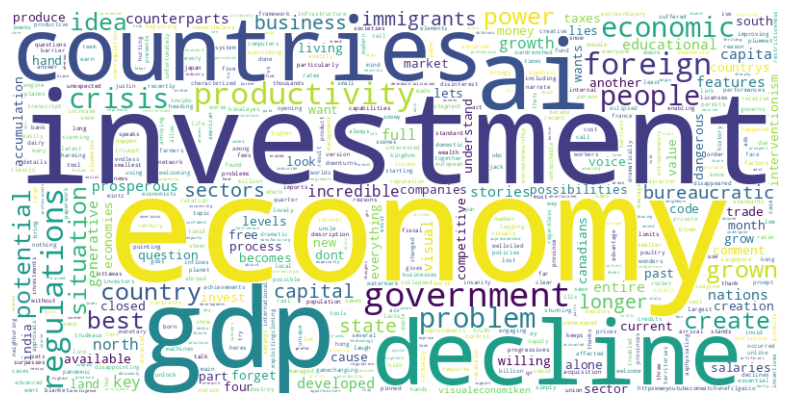

In [156]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a WordCloud object
wc = WordCloud(
    background_color='white',  # Set the background color to white
    max_words=1000,            # Set the maximum number of words to display
    contour_width=0,           # Set contour width to 0 if no contour is needed
    width=800,                 # Set the width of the word cloud image
    height=400                 # Set the height of the word cloud image
)

# Generate the word cloud using the word frequency data obtained from the text processing step
wc.generate_from_frequencies(word_freq)

# Display the word cloud image
plt.figure(figsize=(10, 5))   # Set the size of the image
plt.imshow(wc, interpolation='bilinear')  # Display the word cloud, using bilinear interpolation for smoothing
plt.axis('off')               # Do not show axes
plt.show()

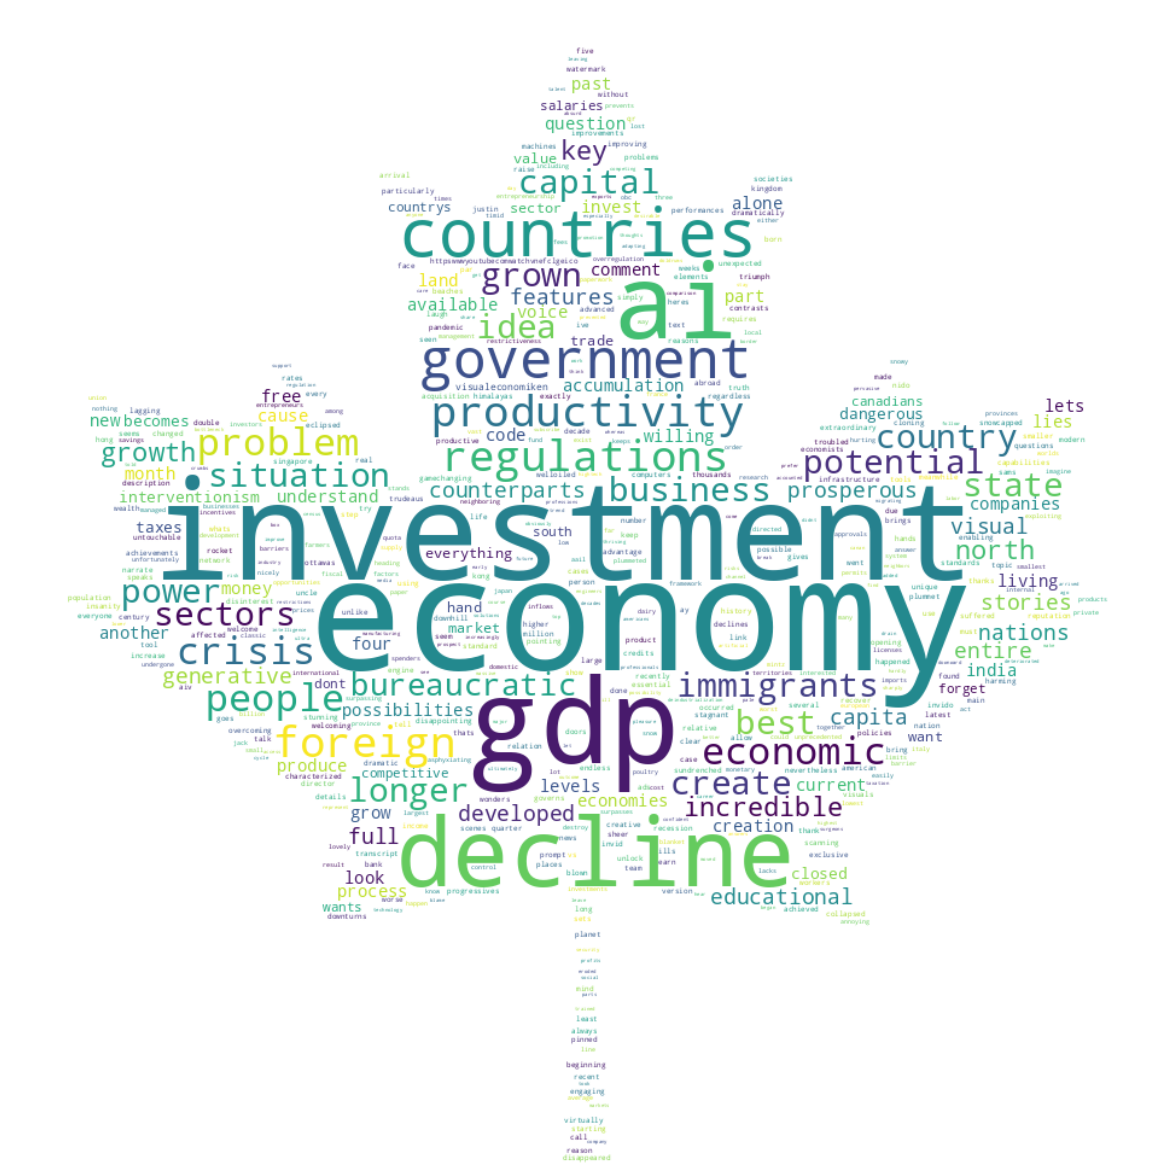

In [157]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the mask image and convert it to grayscale
mask_image = np.array(Image.open('/content/maple.png').convert('L'))

# Threshold the mask to create a binary image
threshold_value = 128
mask_image = np.where(mask_image > threshold_value, 255, 0).astype(np.uint8)

# Check the unique values after thresholding
unique_values = np.unique(mask_image)

# Invert the mask if necessary
if np.sum(mask_image == 0) > np.sum(mask_image == 255):
    # If the majority of the mask is 0, invert it
    mask_image = 255 - mask_image

# Create the WordCloud object
wc = WordCloud(
    background_color='white',
    max_words=1000,
    mask=mask_image,
    prefer_horizontal=1.0,  # Force words to be horizontal
    contour_width=0         # Remove contour to eliminate red border
)

# Generate the word cloud
wc.generate_from_frequencies(word_freq)

# Display the word cloud
plt.figure(figsize=(15, 15))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()
